Text(0,0.5,'Score')

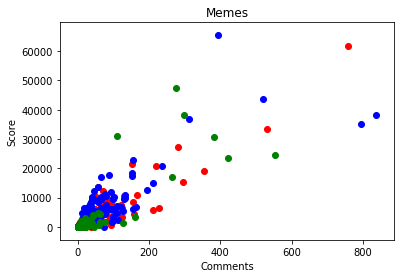

In [21]:
import requests as rq

def _get_data(subreddit, count, after):
    #creates a variable to store url with placeholders for the subreddit, count, and after values
    url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
    #requests the data from the url as a json
    data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
    #prints number of posts retrieved from the page number
    #print "Retrieved %d posts from page %s" % (count, after)
    #function returns the json of the request
    return data

def get_x_y(subreddit, N, count=25):
    #sets after to blank
    after = ""

    #creates new variable to store x and y values
    x, y = [], []
    #loop to go through each value up to N/count
    for n in range(N/count):
        #calls _get_data function
        data = _get_data(subreddit, count, after)
        #for each value in the data set 
        for d in data['data']['children']:
            #set x to the number of comments
            x.append(d['data']['num_comments'])
            #set y to the score
            y.append(d['data']['score'])
        #update the value of after (change the page number?)
        after = data['data']['after']
    #return the value of x and y
    return x, y                      


from matplotlib import pyplot as plt
x, y = get_x_y("memes", 500, count=25)
a, b = get_x_y("dankmemes", 500, count=25)
c, d = get_x_y("madlads",500,count=25)
plt.scatter(x,y, color='red')
plt.scatter(a,b, color='blue')
plt.scatter(c,d,color='green')
plt.title("Memes")
plt.xlabel("Comments")
plt.ylabel("Score")

In [11]:
import praw
import pandas as pd
import datetime as dt

client_id = '6qSW1tPrAbvgQA'
client_secret = 'X8aEBhZDH6c6bM-Iavesb-WRltw'
user_agent = 'my-app/0.0.1'
reddit = praw.Reddit(client_id=client_id,

                    client_secret=client_secret,

                    user_agent=user_agent)

dankmemes = reddit.subreddit('dankmemes')
memes = reddit.subreddit('memes')
madlads = reddit.subreddit('madlads')

dank_top = dankmemes.top(limit=100) #returns top 100 from r/dankmemes
memes_top = memes.top(limit=100) # returns top 100 from r/memes
madlads_top = madlads.top(limit=100) #returns top 100 from r/madlads


#create a dictionary to keep track of values for each meme
dank_dict = { "title":[], "score":[], "comms_num": [], "created": [], "body":[], "author":[], "karma":[], "linkKarma":[]}
memes_dict = { "title":[], "score":[], "comms_num": [], "created": [], "body":[], "author":[], "karma":[], "linkKarma":[]}
madlads_dict = { "title":[], "score":[], "comms_num": [], "created": [], "body":[], "author":[], "karma":[], "linkKarma":[]}

def makeDict(topics_dict, name_top):
    #go through all memes and add the values to the dictionary
    for submission in name_top:
        try:
            topics_dict["karma"].append(submission.author.comment_karma)
            topics_dict["title"].append(submission.title)
            topics_dict["score"].append(submission.score)
            topics_dict["comms_num"].append(submission.num_comments)
            topics_dict["created"].append(submission.created)
            topics_dict["body"].append(submission.selftext)
            topics_dict["author"].append(submission.author)
            topics_dict["linkKarma"].append(submission.author.link_karma)
        except:
            pass
    return topics_dict

#call the makeDict function on the top 100 memes for each page
makeDict(dank_dict, dank_top)
makeDict(memes_dict, memes_top)
makeDict(madlads_dict, madlads_top)

dank_data = pd.DataFrame(dank_dict)
memes_data = pd.DataFrame(memes_dict)
madlads_data = pd.DataFrame(madlads_dict)


In [12]:
#converts the "created" value to a time stamp
def get_time(created):
    return dt.datetime.fromtimestamp(created).time()

#gets the hour the meme was posted from the time stamp
def get_hour(created):
    return dt.datetime.fromtimestamp(created).time().hour

#gets the date the meme was posted
def get_date(created):
    return dt.datetime.fromtimestamp(created).date()

#applies the date and time functions to dankmemes
_time = dank_data["created"].apply(get_time)
_date = dank_data["created"].apply(get_date)
_hour = dank_data["created"].apply(get_hour)
dank_data = dank_data.assign(time = _time)
dank_data = dank_data.assign(data = _date)
dank_data = dank_data.assign(hour = _hour)



In [13]:
#applies the date and time functions to memes
_time = memes_data["created"].apply(get_time)
_date = memes_data["created"].apply(get_date)
m_hour = memes_data["created"].apply(get_hour)
memes_data = memes_data.assign(time = _time)
memes_data = memes_data.assign(data = _date)
memes_data = memes_data.assign(hour = m_hour)


In [14]:
#applies the date and time functions to madlads
_time = madlads_data["created"].apply(get_time)
_date = madlads_data["created"].apply(get_date)
ml_hour = madlads_data["created"].apply(get_hour)
madlads_data = madlads_data.assign(time = _time)
madlads_data = madlads_data.assign(data = _date)
madlads_data = madlads_data.assign(hour = ml_hour)


Text(0,0.5,'Score')

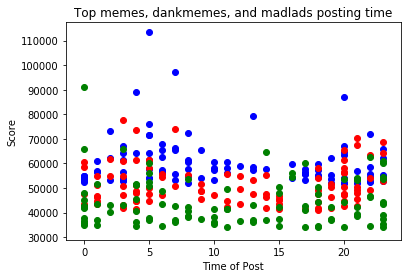

In [6]:
#create a scatter plot of the hour that the top memes were posted compared to their score
from matplotlib import pyplot as plt
plt.scatter(_hour, dank_data["score"], color='blue')
plt.scatter(m_hour, memes_data["score"], color = 'red')
plt.scatter(ml_hour, madlads_data["score"], color = 'green')
plt.title("Top memes, dankmemes, and madlads posting time")
plt.xlabel("Time of Post")
plt.ylabel("Score")



Text(0,0.5,'Comment karma of Redditor')

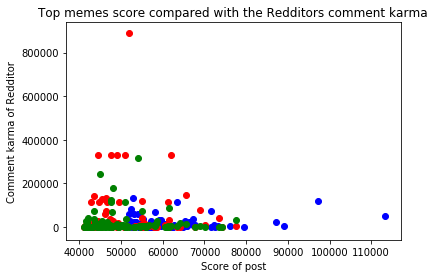

In [17]:
#creates a scatter plot to compare the score of a post to the Redditors comment karma
plt.scatter(dank_data["score"], dank_data["karma"], color='blue')
plt.scatter(memes_data["score"], memes_data["karma"], color = 'red')
plt.scatter(memes_data["score"], madlads_data["karma"], color='green')
plt.title("Top memes score compared with the Redditors comment karma")
plt.xlabel("Score of post")
plt.ylabel("Comment karma of Redditor")


Text(0.5,1,'Top memes score compared with the Redditors link karma')

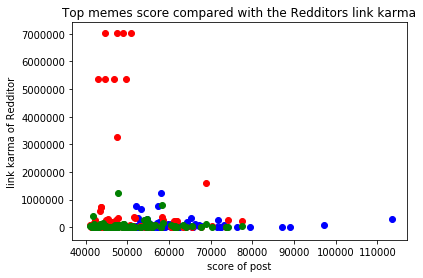

In [16]:
#creates a scatter plot to compare the score of a post to the Redditors link karma
plt.scatter(dank_data["score"], dank_data["linkKarma"], color='blue')
plt.scatter(memes_data["score"], memes_data["linkKarma"], color = 'red')
plt.scatter(memes_data["score"], madlads_data["linkKarma"], color='green')
plt.xlabel("score of post")
plt.ylabel("link karma of Redditor")
plt.title("Top memes score compared with the Redditors link karma")